# Project Idea: Janpanese resturants in Manhattan, New York City
### how many in total?
### how many in different areas (divide them into different areas like upper Manhattan, East Village...)
### which area has highest average stars
### which area has most Janpanese resturrants, which has least?

####  Get Data from Yelp.com by scraping
#### total 34 pages

In [2]:
# my libiaries 
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import Select
from selenium.webdriver.support.ui import WebDriverWait

import pandas as pd
import time
import re
import numpy as np

In [3]:
driver = webdriver.Chrome()
driver.get('https://www.yelp.com/search?find_desc=Japanese+Food&find_loc=Manhattan,+New+York,+NY')


In [4]:
# test out 1 page
datapoints=[]
results = driver.find_elements_by_class_name("regular-search-result")
for result in results:
#     print("---------")
    datapoint= {}
    
    title = result.find_element_by_class_name("biz-name")
    datapoint['name'] = title.text
    datapoint['url'] = title.get_attribute('href')
    try:
        price = result.find_element_by_class_name('price-range')
        datapoint['price'] = price.text
    except:
        print("Doesn't have a price")
    datapoint['categories'] = result.find_element_by_class_name("category-str-list").text
    datapoint['area']=result.find_element_by_class_name('neighborhood-str-list').text
    datapoint['address']=result.find_element_by_tag_name('address').text
    stars = result.find_element_by_class_name("i-stars")
    rating = stars.get_attribute("title")
    datapoint['rating'] = rating.replace(" star rating", "")
#     print(datapoint)
    datapoints.append(datapoint)
    
datapoints

Doesn't have a price


[{'name': 'Sakagura',
  'url': 'https://www.yelp.com/biz/sakagura-new-york?osq=Japanese+Food',
  'price': '$$$',
  'categories': 'Japanese',
  'area': 'Midtown East',
  'address': '211 E 43rd St\nNew York, NY 10017',
  'rating': '4.0'},
 {'name': 'Tsurutontan Udon Noodle Brasserie - Midtown',
  'url': 'https://www.yelp.com/biz/tsurutontan-udon-noodle-brasserie-midtown-new-york?osq=Japanese+Food',
  'price': '$$',
  'categories': 'Japanese, Noodles, Soup',
  'area': 'Midtown West',
  'address': '64 W 48th St\nNew York, NY 10036',
  'rating': '4.0'},
 {'name': 'Kaoru',
  'url': 'https://www.yelp.com/biz/kaoru-new-york?osq=Japanese+Food',
  'price': '$$',
  'categories': 'Japanese',
  'area': 'Midtown East',
  'address': '306 E 46th St\nNew York, NY 10017',
  'rating': '4.5'},
 {'name': 'Izakaya MEW',
  'url': 'https://www.yelp.com/biz/izakaya-mew-new-york-3?osq=Japanese+Food',
  'price': '$$',
  'categories': 'Tapas Bars, Sushi Bars, Izakaya',
  'area': 'Midtown West',
  'address': '53 W

In [6]:
### I don't know why I can't click the next botton


buttonnext = driver.find_element_by_xpath("//*[@id="super-container"]/div/div[2]/div[1]/div/div[4]/div[2]/div/div/div[2]/div/div[10]/a/span[1]")
buttonnext.click()

SyntaxError: invalid syntax (<ipython-input-6-2ef340f83b64>, line 4)

In [5]:
# 2 page
driver = webdriver.Chrome()
driver.get('https://www.yelp.com/search?find_desc=Japanese+Food&find_loc=Manhattan,+New+York,+NY&start=30')

datapoints2=[]
results = driver.find_elements_by_class_name("regular-search-result")
for result in results:
#     print("---------")
    datapoint= {}
    
    title = result.find_element_by_class_name("biz-name")
    datapoint['name'] = title.text
    datapoint['url'] = title.get_attribute('href')
    try:
        price = result.find_element_by_class_name('price-range')
        datapoint['price'] = price.text
    except:
        print("Doesn't have a price")
    datapoint['categories'] = result.find_element_by_class_name("category-str-list").text
    datapoint['area']=result.find_element_by_class_name('neighborhood-str-list').text
    datapoint['address']=result.find_element_by_tag_name('address').text
    stars = result.find_element_by_class_name("i-stars")
    rating = stars.get_attribute("title")
    datapoint['rating'] = rating.replace(" star rating", "")
#     print(datapoint)
    datapoints2.append(datapoint)
    
datapoints2
    

Doesn't have a price


[{'name': 'Ootoya Chelsea',
  'url': 'https://www.yelp.com/biz/ootoya-chelsea-new-york?osq=Japanese+Food',
  'price': '$$',
  'categories': 'Japanese, Sushi Bars',
  'area': 'Flatiron',
  'address': '8 W 18th St\nNew York, NY 10011',
  'rating': '4.0'},
 {'name': '寿司 ノズ',
  'url': 'https://www.yelp.com/biz/sushi-noz-new-york?osq=Japanese+Food',
  'categories': 'Sushi Bars, Japanese, Seafood',
  'area': 'Upper East Side, Yorkville',
  'address': '181 E 78th St\nNew York, NY 10075',
  'rating': '4.5'},
 {'name': 'Donburiya',
  'url': 'https://www.yelp.com/biz/donburiya-new-york-2?osq=Japanese+Food',
  'price': '$$',
  'categories': 'Japanese, Seafood, Desserts',
  'area': 'Midtown West',
  'address': '253 W 55th St\nNew York, NY 10019',
  'rating': '4.0'},
 {'name': 'Zawa Japanese',
  'url': 'https://www.yelp.com/biz/zawa-japanese-new-york?osq=Japanese+Food',
  'price': '$$$',
  'categories': 'Japanese, Sushi Bars',
  'area': 'Upper East Side',
  'address': '354 E 66th St\nNew York, NY 1

In [6]:
# 3 page

driver = webdriver.Chrome()
driver.get('https://www.yelp.com/search?find_desc=Japanese+Food&find_loc=Manhattan,+New+York,+NY&start=60')

datapoints3=[]
results = driver.find_elements_by_class_name("regular-search-result")
for result in results:
#     print("---------")
    datapoint= {}
    
    title = result.find_element_by_class_name("biz-name")
    datapoint['name'] = title.text
    datapoint['url'] = title.get_attribute('href')
    try:
        price = result.find_element_by_class_name('price-range')
        datapoint['price'] = price.text
    except:
        print("Doesn't have a price")
    datapoint['categories'] = result.find_element_by_class_name("category-str-list").text
    datapoint['area']=result.find_element_by_class_name('neighborhood-str-list').text
    datapoint['address']=result.find_element_by_tag_name('address').text
    stars = result.find_element_by_class_name("i-stars")
    rating = stars.get_attribute("title")
    datapoint['rating'] = rating.replace(" star rating", "")
#     print(datapoint)
    datapoints3.append(datapoint)
    
datapoints3
    

Doesn't have a price


[{'name': 'Raku',
  'url': 'https://www.yelp.com/biz/raku-new-york-6?osq=Japanese+Food',
  'price': '$$',
  'categories': 'Japanese, Noodles',
  'area': 'South Village',
  'address': '48 Macdougal St\nNew York, NY 10012',
  'rating': '5.0'},
 {'name': 'Suzuki Shokudo',
  'url': 'https://www.yelp.com/biz/suzuki-shokudo-long-island-city?osq=Japanese+Food',
  'price': '$$',
  'categories': 'Japanese, Sushi Bars',
  'area': 'Long Island City',
  'address': '38-01 31st St\nLong Island City, NY 11101',
  'rating': '4.5'},
 {'name': 'Oita Sushi',
  'url': 'https://www.yelp.com/biz/oita-sushi-new-york?osq=Japanese+Food',
  'price': '$$',
  'categories': 'Sushi Bars, Caterers, Salad',
  'area': 'Upper East Side',
  'address': '1317A 2nd Ave 69th St\nNew York, NY 10021',
  'rating': '4.5'},
 {'name': 'TONCHIN NEW YORK',
  'url': 'https://www.yelp.com/biz/tonchin-new-york-new-york?osq=Japanese+Food',
  'price': '$$',
  'categories': 'Ramen',
  'area': 'Midtown West',
  'address': '13 W 36th St\nN

In [7]:
# change to dataframe
df1 = pd.DataFrame(datapoints)
df2 = pd.DataFrame(datapoints2)
df3 = pd.DataFrame(datapoints3)

# add df together
frames = [df1, df2, df3]
df_all = pd.concat(frames)

In [10]:
df_all.to_csv("japanese_page3.csv", index=False)

In [11]:
df4=pd.read_csv('japanese_page3.csv')
df4

,address,area,categories,name,price,rating,url
0,211 E 43rd St,Midtown East,Japanese,Sakagura,$$$,4.0,https://www.yelp.com/biz/sakagura-new-york?osq...
1,64 W 48th St,Midtown West,"Japanese, Noodles, Soup",Tsurutontan Udon Noodle Brasserie - Midtown,$$,4.0,https://www.yelp.com/biz/tsurutontan-udon-nood...
2,306 E 46th St,Midtown East,Japanese,Kaoru,$$,4.5,https://www.yelp.com/biz/kaoru-new-york?osq=Ja...
3,53 W 35th St,Midtown West,"Tapas Bars, Sushi Bars, Izakaya",Izakaya MEW,$$,4.0,https://www.yelp.com/biz/izakaya-mew-new-york-...
4,213 E 45th St,Midtown East,"Tapas/Small Plates, Izakaya",Aburiya Kinnosuke,$$$,4.0,https://www.yelp.com/biz/aburiya-kinnosuke-new...
5,249 E 49th St,Midtown East,Japanese,Yamada Chikara NY,$$$$,5.0,https://www.yelp.com/biz/yamada-chikara-ny-new...
6,118 Madison Ave,Midtown East,Japanese,nonono,$$,4.5,https://www.yelp.com/biz/nonono-new-york-6?osq...
7,131 E 45th St,Midtown East,Japanese,Tonkatsu Matsunoya,$$,4.0,https://www.yelp.com/biz/tonkatsu-matsunoya-ne...
8,"251 W 55th St, Fl 2",Midtown West,Japanese,Yakitori Totto,$$$,4.0,https://www.yelp.com/biz/yakitori-totto-new-yo...
9,31 W 52nd St,Midtown West,"Japanese, Asian Fusion",Omakasa,$$,4.0,https://www.yelp.com/biz/omakasa-new-york-4?os...


### Make some graphics

In [12]:
import matplotlib.pyplot as plt

# make us all graphics
%matplotlib inline

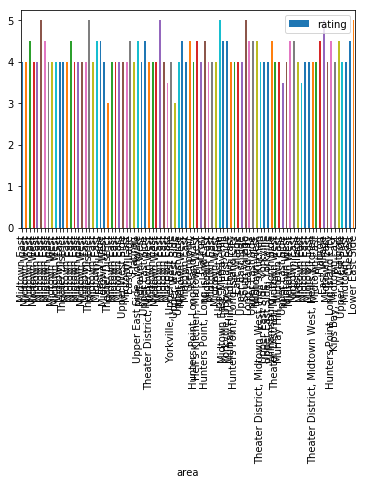

In [14]:
df4.plot(kind="bar",x='area',y='rating')

In [16]:
df4['area'].value_counts()

Midtown East                                      32
Midtown West                                      13
Upper East Side                                    6
Hunters Point, Long Island City                    4
East Village                                       4
Flatiron                                           4
Upper West Side                                    3
Upper East Side, Yorkville                         3
Theater District                                   3
Yorkville, Upper East Side                         2
Theater District, Midtown West, Hell's Kitchen     2
Murray Hill, Midtown East                          2
Theater District, Midtown West                     2
Chelsea                                            1
Williamsburg - North Side                          1
Hell's Kitchen, Midtown West                       1
Kips Bay, Midtown East                             1
South Village                                      1
Lower East Side                               

In [19]:
df_mideast=df4[df4['area'].str.contains('Midtown East')]
df_mideast

,address,area,categories,name,price,rating,url
0,211 E 43rd St,Midtown East,Japanese,Sakagura,$$$,4.0,https://www.yelp.com/biz/sakagura-new-york?osq...
2,306 E 46th St,Midtown East,Japanese,Kaoru,$$,4.5,https://www.yelp.com/biz/kaoru-new-york?osq=Ja...
4,213 E 45th St,Midtown East,"Tapas/Small Plates, Izakaya",Aburiya Kinnosuke,$$$,4.0,https://www.yelp.com/biz/aburiya-kinnosuke-new...
5,249 E 49th St,Midtown East,Japanese,Yamada Chikara NY,$$$$,5.0,https://www.yelp.com/biz/yamada-chikara-ny-new...
6,118 Madison Ave,Midtown East,Japanese,nonono,$$,4.5,https://www.yelp.com/biz/nonono-new-york-6?osq...
7,131 E 45th St,Midtown East,Japanese,Tonkatsu Matsunoya,$$,4.0,https://www.yelp.com/biz/tonkatsu-matsunoya-ne...
10,237 E 53rd St,Midtown East,Japanese,Jukai,$$$,4.0,https://www.yelp.com/biz/jukai-new-york?osq=Ja...
12,211 E 43rd St,Midtown East,Japanese,Soba Totto,$$,4.0,https://www.yelp.com/biz/soba-totto-new-york?o...
13,304 E 49th St,Midtown East,"Japanese, Bars, Breakfast & Brunch",Fukusuke,$$,4.5,https://www.yelp.com/biz/fukusuke-new-york?osq...
14,17 E 48th St,Midtown East,"Japanese, Sushi Bars",Hatsuhana Sushi Restaurant,$$$,4.0,https://www.yelp.com/biz/hatsuhana-sushi-resta...


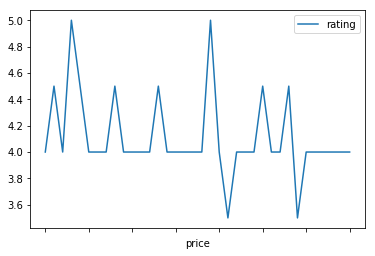

In [21]:
df_mideast.plot(x='price',y='rating')

In [24]:
# get the mean of rating of midtown east
df_mideast['rating'].mean()

4.111111111111111

In [42]:
df_mideast['rating'].value_counts()

4.0    26
4.5     6
3.5     2
5.0     2
Name: rating, dtype: int64

In [22]:
df4['area'].value_counts().head(5)

Midtown East                       32
Midtown West                       13
Upper East Side                     6
Hunters Point, Long Island City     4
East Village                        4
Name: area, dtype: int64

In [25]:
df_midwest=df4[df4['area'].str.contains('Midtown West')]
df_midwest

,address,area,categories,name,price,rating,url
1,64 W 48th St,Midtown West,"Japanese, Noodles, Soup",Tsurutontan Udon Noodle Brasserie - Midtown,$$,4.0,https://www.yelp.com/biz/tsurutontan-udon-nood...
3,53 W 35th St,Midtown West,"Tapas Bars, Sushi Bars, Izakaya",Izakaya MEW,$$,4.0,https://www.yelp.com/biz/izakaya-mew-new-york-...
8,"251 W 55th St, Fl 2",Midtown West,Japanese,Yakitori Totto,$$$,4.0,https://www.yelp.com/biz/yakitori-totto-new-yo...
9,31 W 52nd St,Midtown West,"Japanese, Asian Fusion",Omakasa,$$,4.0,https://www.yelp.com/biz/omakasa-new-york-4?os...
16,11 W 51st St,Midtown West,"Sushi Bars, Japanese",Hama Japanese Cuisine,$$,4.0,https://www.yelp.com/biz/hama-japanese-cuisine...
22,"45 W 55th St, Fl 2",Midtown West,Japanese,Katsu-Hama,$$,4.0,https://www.yelp.com/biz/katsu-hama-new-york-2...
32,"253 W 55th St\nNew York, NY 10019",Midtown West,"Japanese, Seafood, Desserts",Donburiya,$$,4.0,https://www.yelp.com/biz/donburiya-new-york-2?...
34,"245 W 51st St\nNew York, NY 10019","Theater District, Midtown West","Tapas/Small Plates, Ramen, Sushi Bars",Nippori,$$,4.0,https://www.yelp.com/biz/nippori-new-york?osq=...
36,"251 W 55th St\nNew York, NY 10019",Midtown West,"Japanese, Noodles, Beer, Wine & Spirits",SOBA AZUMA,$$,4.0,https://www.yelp.com/biz/soba-azuma-new-york?o...
43,"1369 6th Ave\nNew York, NY 10019",Midtown West,"Japanese, Sushi Bars",MakiMaki,$$,4.5,https://www.yelp.com/biz/makimaki-new-york?osq...


In [29]:
df_midwest['rating'].mean()

4.111111111111111

In [40]:
df_midwest['rating'].value_counts()

4.0    14
4.5     4
Name: rating, dtype: int64

In [26]:
df_uppereast=df4[df4['area'].str.contains('Upper East Side')]
df_uppereast

,address,area,categories,name,price,rating,url
31,"181 E 78th St\nNew York, NY 10075","Upper East Side, Yorkville","Sushi Bars, Japanese, Seafood",寿司 ノズ,NaN,4.5,https://www.yelp.com/biz/sushi-noz-new-york?os...
33,"354 E 66th St\nNew York, NY 10065",Upper East Side,"Japanese, Sushi Bars",Zawa Japanese,$$$,4.5,https://www.yelp.com/biz/zawa-japanese-new-yor...
40,"309 E 83rd St\nNew York, NY 10028","Yorkville, Upper East Side",Japanese,Donguri Restaurant,$$$,4.0,https://www.yelp.com/biz/donguri-restaurant-ne...
42,"1143 1st Ave\nNew York, NY 10021",Upper East Side,"Japanese, Sushi Bars",Sushi Seki,$$$,4.0,https://www.yelp.com/biz/sushi-seki-new-york-5...
53,"1109 Lexington Ave\nNew York, NY 10075",Upper East Side,"Asian Fusion, Japanese, Korean",MIGHTY Bowl,$$,5.0,https://www.yelp.com/biz/mighty-bowl-new-york-...
55,"310 E 93rd St\nNew York, NY 10128","Yorkville, Upper East Side",Japanese,CHOCHIN,$$,4.5,https://www.yelp.com/biz/chochin-new-york-2?os...
59,"1167 2nd Ave\nNew York, NY 10065",Upper East Side,"Japanese, Sushi Bars, Asian Fusion",Atami Japanese Fusion,$$,4.0,https://www.yelp.com/biz/atami-japanese-fusion...
62,"1317A 2nd Ave 69th St\nNew York, NY 10021",Upper East Side,"Sushi Bars, Caterers, Salad",Oita Sushi,$$,4.5,https://www.yelp.com/biz/oita-sushi-new-york?o...
65,"1372 York Ave\nNew York, NY 10021","Upper East Side, Yorkville","Japanese, Sushi Bars",Tanoshi Bento,$$,4.0,https://www.yelp.com/biz/tanoshi-bento-new-yor...
66,"1466 1st Ave\nNew York, NY 10075","Upper East Side, Yorkville","Japanese, Sushi Bars",Momokawa,$$$,4.0,https://www.yelp.com/biz/momokawa-new-york-2?o...


In [30]:
df_uppereast['rating'].mean()

4.2272727272727275

In [44]:
df_uppereast['rating'].value_counts()

4.0    5
4.5    4
3.5    1
5.0    1
Name: rating, dtype: int64

In [41]:
df_uppereast['rating'].value_counts()

4.0    5
4.5    4
3.5    1
5.0    1
Name: rating, dtype: int64

In [27]:
df_hunters=df4[df4['area'].str.contains('Hunters Point')]
df_hunters

,address,area,categories,name,price,rating,url
46,"5-50 50th Ave\nLong Island City, NY 11101","Hunters Point, Long Island City","Coffee & Tea, Izakaya, Noodles",Takumen,$$,4.0,https://www.yelp.com/biz/takumen-long-island-c...
49,"4644 Vernon Blvd\nLong Island City, NY 11101","Hunters Point, Long Island City","Japanese, Sushi Bars",Murasaki,$$,4.5,https://www.yelp.com/biz/murasaki-long-island-...
57,"10-70 Jackson Ave\nLong Island City, NY 11101","Hunters Point, Long Island City",Japanese,Hibino,$$,4.0,https://www.yelp.com/biz/hibino-long-island-ci...
83,"47-38 Vernon Blvd\nLong Island City, NY 11101","Hunters Point, Long Island City","Sushi Bars, Japanese",Sushi Daizen,$$$$,4.5,https://www.yelp.com/biz/sushi-daizen-long-isl...


In [36]:
df_hunters['rating'].mean()

4.25

In [45]:
df_hunters['rating'].value_counts()

4.5    2
4.0    2
Name: rating, dtype: int64

In [28]:
df_eastvil=df4[df4['area'].str.contains('East Village')]
df_eastvil

,address,area,categories,name,price,rating,url
21,108 E 4th St,East Village,"Japanese, Comfort Food, Tapas/Small Plates",Benemon,$$,4.5,https://www.yelp.com/biz/benemon-new-york?osq=...
29,342 E 6th St,East Village,"Japanese, Noodles",Raku,$$,4.5,https://www.yelp.com/biz/raku-new-york-4?osq=J...
58,"326 E 6th St\nNew York, NY 10003",East Village,"Izakaya, Tapas/Small Plates",Izakaya,$$,4.0,https://www.yelp.com/biz/izakaya-new-york-2?os...
81,"239 E 5th St\nNew York, NY 10003",East Village,"French, Japanese",Restaurant Ukiyo,NaN,5.0,https://www.yelp.com/biz/restaurant-ukiyo-new-...


In [37]:
df_eastvil['rating'].mean()

4.5

In [46]:
df_eastvil['rating'].value_counts()

4.5    2
5.0    1
4.0    1
Name: rating, dtype: int64

In [48]:
area_list=[{
    'area':'Midtown East',
    'average rating': 4.11,
    'higest rating':5.00,
    'lowest rating':3.50
},
    {
    'area':'Midtown West',
    'average rating': 4.11,
    'higest rating':4.50,
    'lowest rating':4.00
},
    {
    'area':'Upper East Side',
    'average rating': 4.23,
    'higest rating':5.00,
    'lowest rating':3.50
},
    {
    'area':'Hunters Point',
    'average rating': 4.25,
    'higest rating':4.50,
    'lowest rating':4.0
},
    {
    'area':'East Village',
    'average rating': 4.50,
    'higest rating':5.00,
    'lowest rating':4.00
}
]

df5 = pd.DataFrame(area_list)
df5

,area,average rating,higest rating,lowest rating
0,Midtown East,4.11,5.0,3.5
1,Midtown West,4.11,4.5,4.0
2,Upper East Side,4.23,5.0,3.5
3,Hunters Point,4.25,4.5,4.0
4,East Village,4.50,5.0,4.0


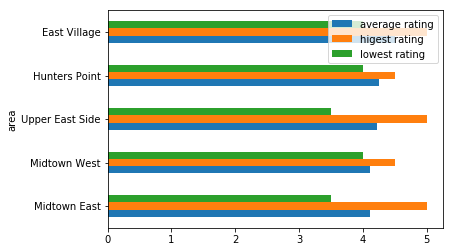

In [49]:
df5.plot(kind='barh',x='area')

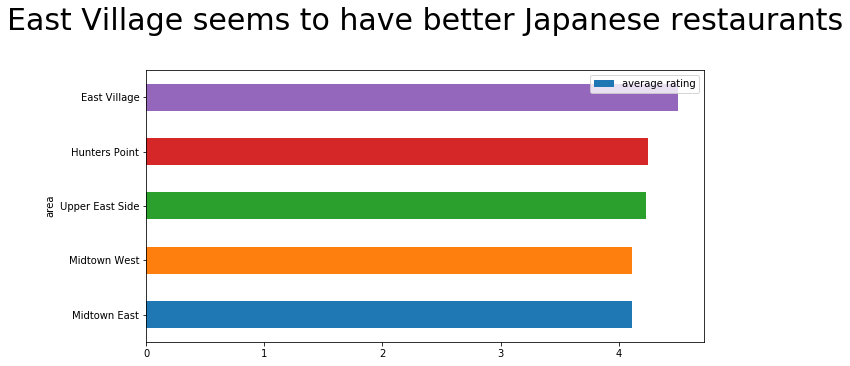

In [59]:
ax=df5.plot(kind='barh',x='area',y='average rating',figsize=(10,5))
ax.set_title("East Village seems to have better Japanese restaurants",pad =40)
ax.title.set_fontsize(30)

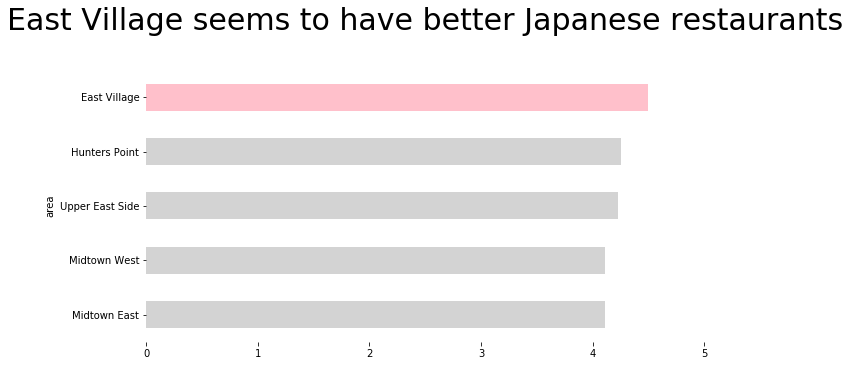

In [60]:


def get_color(area):
    if area == "East Village":
        return 'pink'
    else:
        return 'lightgray'

bar_colors = [get_color(name) for name in df5.area]

ax=df5.plot(kind='barh',x='area',y='average rating',figsize=(10,5),legend=False, color=bar_colors)

ax.set_title("East Village seems to have better Japanese restaurants",pad =40)
ax.title.set_fontsize(30)

ax.set_xticks([0,1,2,3,4,5])

# get rid of spines(边上的线)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)

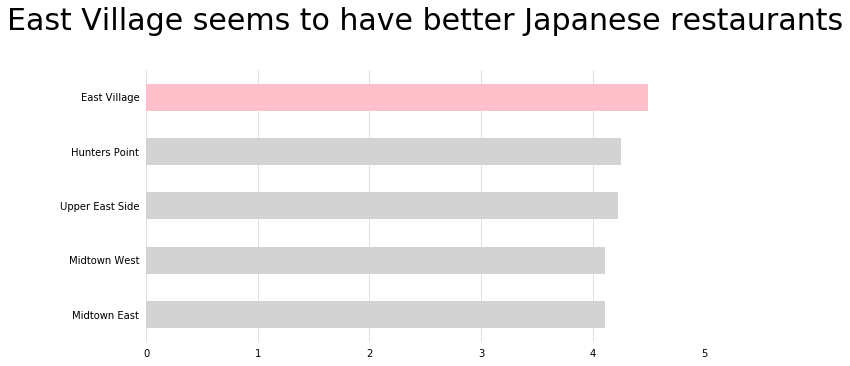

In [71]:


def get_color(area):
    if area == "East Village":
        return 'pink'
    else:
        return 'lightgray'

bar_colors = [get_color(name) for name in df5.area]

ax=df5.plot(kind='barh',x='area',y='average rating',figsize=(10,5),legend=False, color=bar_colors)

ax.set_title("East Village seems to have better Japanese restaurants",pad =40)
ax.title.set_fontsize(30)

ax.set_xticks([0,1,2,3,4,5])

# get rid of spines(边上的线)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)



ax.tick_params(which='major',left=False,bottom=False,grid_alpha=0.5)


ax.grid(True,axis='x')
# # axis below the graph
ax.set_axisbelow(True)



ax.yaxis.label.set_visible(False)

1.A paragraph or two about the work you've done (data sourcing, data cleaning, etc)

I scraped the yelp.com to get the names of restaurants, area of restaurants, and prices an ratings of restaurant.
Then, I categorized my data based on 'area' and get the mean of rating and the highest rating and lowest rating of each area.



2.A paragraph or two about your findings

Based on those limited data, I assume that East Village has better Japanese restaurants.


3.A list of additional "nice to have" improvements - this can be other graphics, improvements on your existing graphics, or further data analysis.

I should try to get more data from the yelp. Maybe 10 or 20 pages.


In [72]:
# # multiple pages
# def get_restaurant(row):
#     try:

#     driver = webdriver.Chrome()
#     driver.get('https://www.yelp.com/search?find_desc=Japanese+Food&find_loc=Manhattan,+New+York,+NY')

#     datapoints=[]
#     results = driver.find_elements_by_class_name("regular-search-result")
#     for result in results:
#     #     print("---------")
#         datapoint= {}

#         title = result.find_element_by_class_name("biz-name")
#         datapoint['name'] = title.text
#         datapoint['url'] = title.get_attribute('href')
#         try:
#             price = result.find_element_by_class_name('price-range')
#             datapoint['price'] = price.text
#         except:
#             print("Doesn't have a price")
#         datapoint['categories'] = result.find_element_by_class_name("category-str-list").text
#         datapoint['area']=result.find_element_by_class_name('neighborhood-str-list').text
#         datapoint['address']=result.find_element_by_tag_name('address').text
#         stars = result.find_element_by_class_name("i-stars")
#         rating = stars.get_attribute("title")
#         datapoint['rating'] = rating.replace(" star rating", "")
#     #     print(datapoint)
#         datapoints.append(datapoint)

#     time.sleep(2)   

#     buttonnext = driver.find_element_by_class_name("pagination-label responsive-hidden-small pagination-links_anchor")
#     buttonnext.click()
    
#     return pd.Series({
#             'points': points,
#             'violations': violations
#         })
#     except:
#         return pd.Series({})

